In [60]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.metrics import roc_curve, roc_auc_score,plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [61]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [62]:
df = pd.read_excel('round4.xlsx')
df_complete = df[df['Completed'] > 0]
df_complete = df_complete[df_complete['School_Decision'] != "Administrative Withdrawal"]
df_complete = df_complete[df_complete['School_Decision'] != "Withdraw"]

In [63]:
df_complete['Race'].fillna("nan", inplace=True)
df_complete['Sex'].fillna("nan", inplace=True)
df_complete['Native Language'].fillna("nan", inplace=True)
df_complete['Citizenship'].fillna("nan", inplace=True)
df_complete['Have you ever failed a course?'].fillna("nan", inplace=True)
df_complete['GRE Verified'].fillna("No", inplace=True)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Waitlist", "Deny")
df_complete['Overall_GPA'].fillna(0, inplace=True)
df_complete['student_Decision'].fillna("nan",inplace=True)
df_complete['student_Decision']=df_complete['student_Decision'].replace("nan", "Decline Offer")
df_complete['student_Decision']=df_complete['student_Decision'].replace("No Response", "Decline Offer")


In [64]:
df_complete['Race']=LabelEncoder().fit_transform(df_complete['Race'])
df_complete['Native Language']=LabelEncoder().fit_transform(df_complete['Native Language'])
df_complete['Citizenship']=LabelEncoder().fit_transform(df_complete['Citizenship'])
df_complete['GRE Verified']=LabelEncoder().fit_transform(df_complete['GRE Verified'])
df_complete['School_Decision']=LabelEncoder().fit_transform(df_complete['School_Decision'])
df_complete['Sex']=LabelEncoder().fit_transform(df_complete['Sex'])
df_complete['student_Decision']=LabelEncoder().fit_transform(df_complete['student_Decision'])

In [65]:
df_complete.head(10)

,Unnamed: 0,Ref,Sex,Citizenship,Native Language,Race,Have you ever failed a course?,Sub-Category,Birth Country,Tuition Percentage,year,Completed,School_Decision,student_Decision,final_Decision,Been_On_Waitinglist,Overall_GPA,GRE Verbal,GRE Verbal Percentile,GRE Quantitative,GRE Quantitative Percentile,GRE Analytical Writing,GRE Analytical Writing Percentile,GRE Verified,avg_score_round,Number_Recommender,Graduation_Year,Graduation_Country,Year_after_graduation,Just_after_graduation,job1_duration,job2_duration,job3_duration,max_job_duration,full-time_job_experience
0,0,511330193,1,0,24,4,0,Computational Methods,IN,NaN,2021,1,1,1,NaN,0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0,4,3,2020.0,India,1.0,1.0,NaN,NaN,NaN,NaN,0
1,1,723116564,0,0,14,4,0,Computational Methods,IN,40.0,2021,1,0,0,Accept Offer,0,3.560,157.0,75.0,168.0,92.0,3.5,38.0,1,5,3,2017.0,India,4.0,0.0,NaN,NaN,NaN,NaN,0
2,2,533806749,0,0,14,4,0,Statistical Methodology,IN,NaN,2021,1,1,1,NaN,0,2.920,146.0,28.0,163.0,80.0,3.0,14.0,1,4,3,2021.0,India,0.0,1.0,61.0,121.0,92.0,4.0,0
3,3,253306511,0,0,14,4,0,Statistical Methodology,IN,NaN,2021,1,1,1,NaN,0,3.288,NaN,NaN,NaN,NaN,NaN,NaN,0,5,3,2014.0,India,7.0,0.0,NaN,1612.0,NaN,54.0,1
4,7,60206854,1,0,51,11,0,Health and Biomedical Sciences,IN,NaN,2017,1,1,1,NaN,0,3.096,NaN,NaN,NaN,NaN,NaN,NaN,0,3,3,2015.0,India,2.0,0.0,NaN,NaN,NaN,NaN,0
5,8,120240620,1,1,9,10,0,Statistical Methodology,IR,NaN,2017,1,1,1,NaN,0,3.360,NaN,NaN,NaN,NaN,NaN,NaN,0,5,3,2018.0,US,-1.0,1.0,486.0,NaN,NaN,16.0,0
6,9,868223637,1,0,51,11,1,Statistical Methodology,PK,NaN,2020,1,1,1,NaN,0,3.510,NaN,NaN,NaN,NaN,NaN,NaN,0,4,3,2020.0,Pakistan,0.0,1.0,NaN,92.0,NaN,3.0,0
7,10,57943445,1,0,34,11,0,Statistical Methodology,BE,40.0,2020,1,0,2,Defer,0,2.920,163.0,93.0,166.0,89.0,4.5,81.0,1,5,3,2019.0,Belgium,1.0,1.0,396.0,943.0,NaN,31.0,0
8,11,57943445,1,0,34,11,0,Statistical Methodology,BE,40.0,2021,1,0,1,Decline Offer,0,2.920,163.0,93.0,166.0,89.0,4.5,81.0,1,0,0,2019.0,Belgium,2.0,0.0,396.0,943.0,NaN,31.0,1
9,14,792101457,1,0,46,11,0,Business and Social Science,IN,NaN,2016,1,1,1,NaN,0,2.996,145.0,25.0,170.0,98.0,3.5,38.0,1,4,3,2014.0,India,2.0,0.0,NaN,335.0,NaN,11.0,1


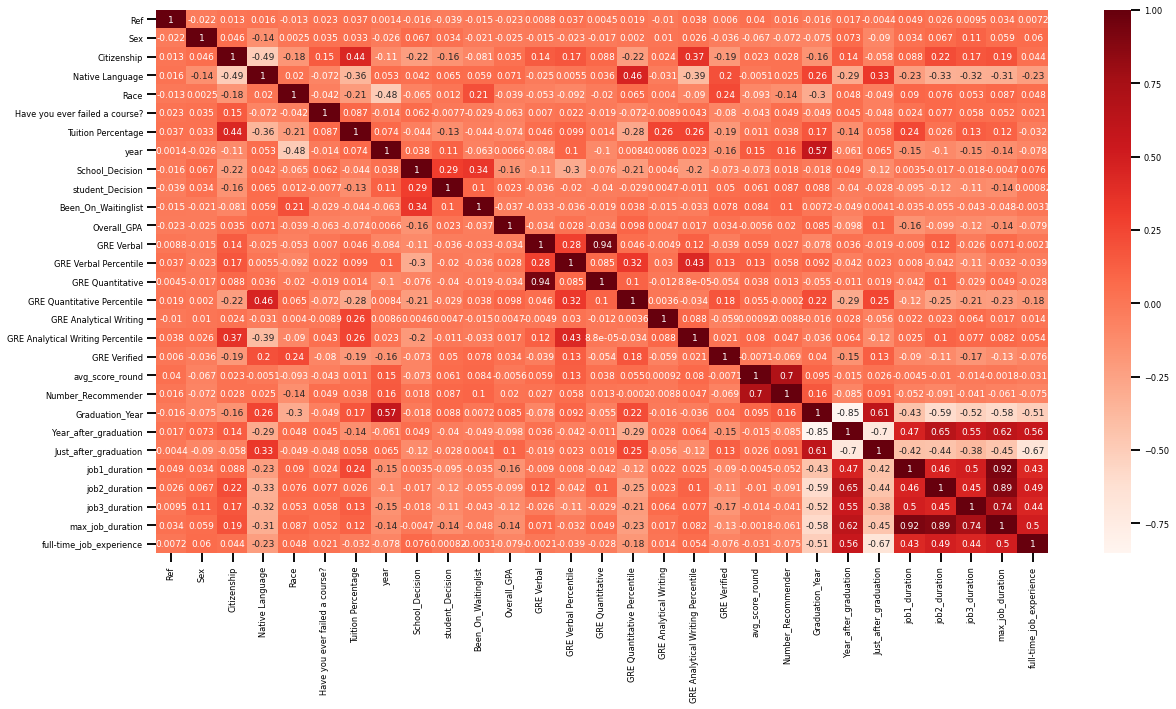

In [66]:
#Heatmap
df1=df_complete.copy()
df1=df1.drop(['Completed'], axis=1)
plt.figure(figsize = (20,10))
sns.set_context('talk', font_scale = 0.5)
sns.heatmap(df1.iloc[:,1:].corr(), cmap = 'Reds', annot = True)

In [81]:
#fill nan in GRE with median, mean and drop
m1 = df_complete.copy()
verbal_mean = m1['GRE Verbal'].mean()
writing_mean = m1['GRE Analytical Writing'].mean()
quant_mean = m1['GRE Quantitative'].mean()
m1['GRE Verbal'].fillna(verbal_mean, inplace=True)
m1['GRE Analytical Writing'].fillna(writing_mean, inplace=True)
m1['GRE Quantitative'].fillna(quant_mean, inplace=True)

m2 = df_complete.copy()
verbal_median = m2['GRE Verbal'].median()
writing_median = m2['GRE Analytical Writing'].median()
quant_median = m2['GRE Quantitative'].median()
m2['GRE Verbal'].fillna(verbal_median, inplace=True)
m2['GRE Analytical Writing'].fillna(writing_median, inplace=True)
m2['GRE Quantitative'].fillna(quant_median, inplace=True)

In [98]:
feature_cols = ['Race','Native Language','Citizenship','Have you ever failed a course?','Overall_GPA','GRE Verbal','GRE Quantitative']
x= m1[feature_cols]
y = m1['School_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1234)

In [93]:
feature_cols = ['Race','Native Language','Citizenship','Have you ever failed a course?','Overall_GPA','GRE Verbal','GRE Quantitative']
x= m2[feature_cols]
y = m2['School_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1234)

In [55]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [99]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print("Roc_Auc_Score: ", roc_auc_score(y_test, pred))

0.7315789473684211
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       239
           1       0.75      0.81      0.78       331

    accuracy                           0.73       570
   macro avg       0.73      0.72      0.72       570
weighted avg       0.73      0.73      0.73       570

Roc_Auc_Score:  0.7171307942206322


In [94]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print("Roc_Auc_Score: ", roc_auc_score(y_test, pred))
# get_feature_importance(rf, predictors)

0.7473684210526316
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       239
           1       0.76      0.82      0.79       331

    accuracy                           0.75       570
   macro avg       0.74      0.73      0.74       570
weighted avg       0.75      0.75      0.74       570

Roc_Auc_Score:  0.7330518651480868


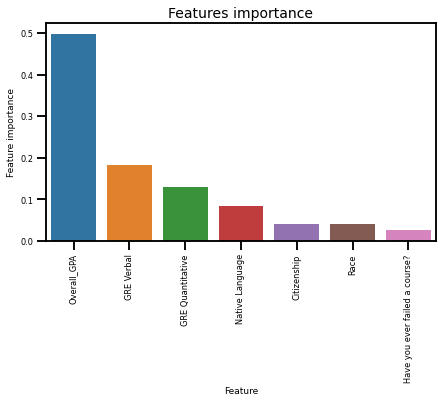

In [74]:
tmp = pd.DataFrame({'Feature': feature_cols, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
s2 = accuracy_score(Y_test, Y_pred)
s3 = precision_score(Y_test, Y_pred)
s4 = recall_score(Y_test, Y_pred)
s5 = f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
print("Precision score: ", s3)
print("Recall score: ", s4)
print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))
print("Roc_Auc_Score: ", roc_auc_score(Y_test, Y_pred))

Accuracy score:  0.6596491228070176
Precision score:  0.6807387862796834
Recall score:  0.7794561933534743
F1 score:  0.7267605633802816
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       239
           1       0.68      0.78      0.73       331

    accuracy                           0.66       570
   macro avg       0.65      0.64      0.64       570
weighted avg       0.65      0.66      0.65       570

Roc_Auc_Score:  0.6365900213629295


In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
s2 = accuracy_score(Y_test, Y_pred)
s3 = precision_score(Y_test, Y_pred)
s4 = recall_score(Y_test, Y_pred)
s5 = f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
print("Precision score: ", s3)
print("Recall score: ", s4)
print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))
print("Roc_Auc_Score: ", roc_auc_score(Y_test, Y_pred))

Accuracy score:  0.6649122807017543
Precision score:  0.6851851851851852
Recall score:  0.7824773413897281
F1 score:  0.7306064880112836
              precision    recall  f1-score   support

           0       0.62      0.50      0.56       239
           1       0.69      0.78      0.73       331

    accuracy                           0.66       570
   macro avg       0.66      0.64      0.64       570
weighted avg       0.66      0.66      0.66       570

Roc_Auc_Score:  0.6422846957994666


In [ ]:
# Decision Tree  using GridSearchCV to find optimal parameters
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

#training
grid_tree.fit(X_train, Y_train)
#print best parameters
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

In [101]:
# use best parameters
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
s2 = accuracy_score(Y_test,Y_pred)
s5=f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))


Accuracy score:  0.7473684210526316
F1 score:  0.7925072046109511
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       239
           1       0.76      0.83      0.79       331

    accuracy                           0.75       570
   macro avg       0.74      0.73      0.73       570
weighted avg       0.75      0.75      0.74       570



C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


In [96]:
# use best parameters
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
s2 = accuracy_score(Y_test,Y_pred)
s5=f1_score(Y_test, Y_pred)
print("Accuracy score: ", s2)
print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))


Accuracy score:  0.7491228070175439
F1 score:  0.7930535455861071
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       239
           1       0.76      0.83      0.79       331

    accuracy                           0.75       570
   macro avg       0.74      0.73      0.74       570
weighted avg       0.75      0.75      0.75       570



C:\Users\admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


In [97]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, pred)
print(matrix)

[[154  85]
 [ 59 272]]


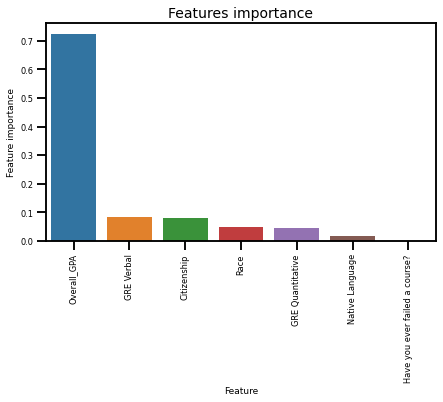

In [77]:
tmp = pd.DataFrame({'Feature': feature_cols, 'Feature importance': dt.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

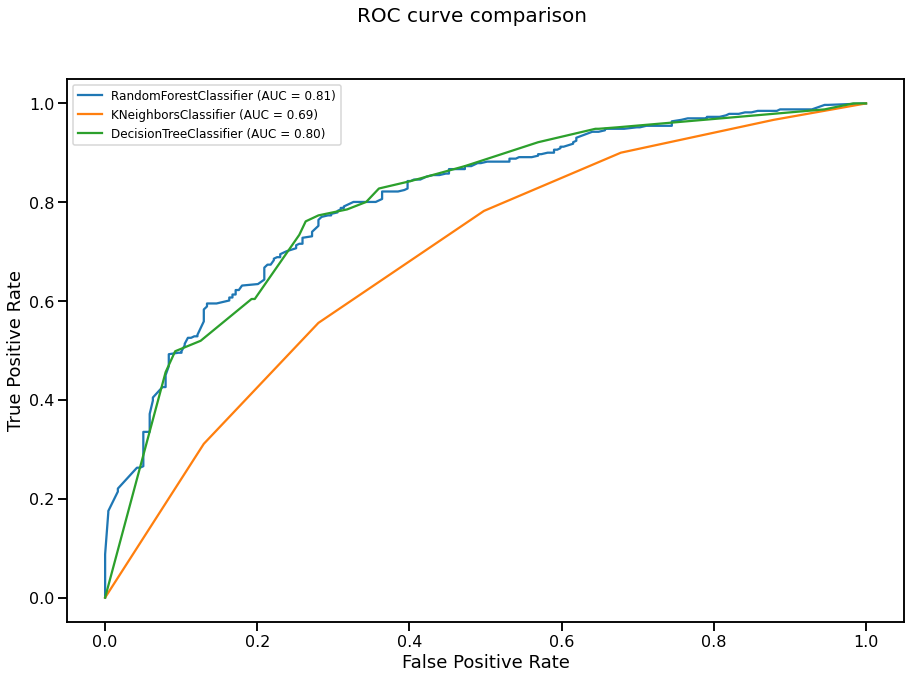

In [78]:
rf_auc_curve = plot_roc_curve(rf, X_test, Y_test)
knn_auc_curve = plot_roc_curve(knn, X_test, Y_test, ax=rf_auc_curve.ax_)
dt_auc_curve = plot_roc_curve(dt, X_test, Y_test, ax=rf_auc_curve.ax_)
rf_auc_curve.figure_.suptitle("ROC curve comparison",fontsize=20)
# plt.rcParams.update({'figure.figsize': (15,10)})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("False Positive Rate",fontsize=18)
plt.ylabel("True Positive Rate",fontsize=18)
plt.legend(fontsize=12) 
plt.show()

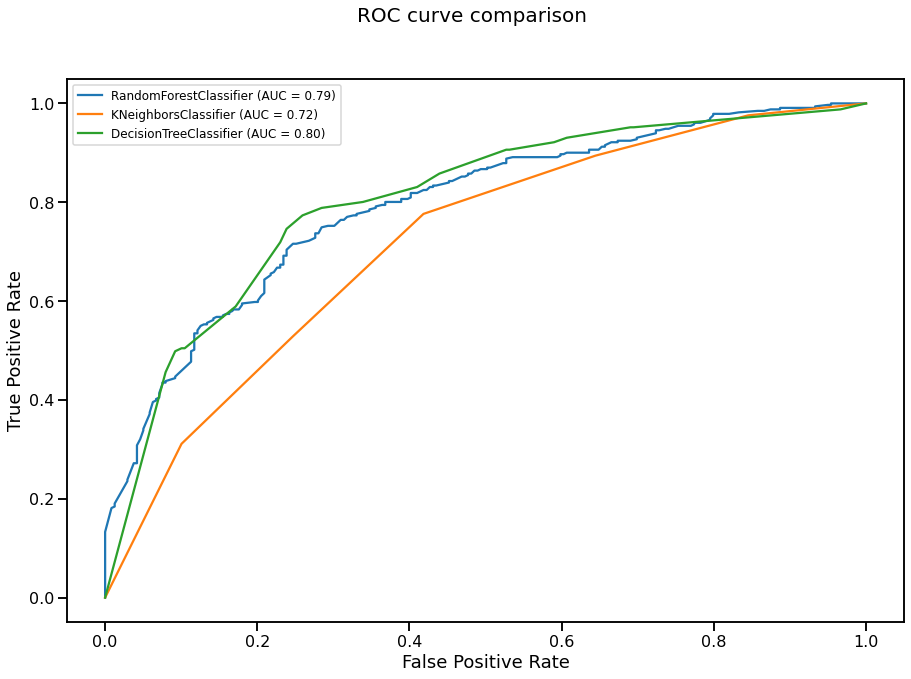

In [53]:
rf_auc_curve = plot_roc_curve(rf, X_test, Y_test)
knn_auc_curve = plot_roc_curve(knn, X_test, Y_test, ax=rf_auc_curve.ax_)
dt_auc_curve = plot_roc_curve(dt, X_test, Y_test, ax=rf_auc_curve.ax_)
rf_auc_curve.figure_.suptitle("ROC curve comparison",fontsize=20)
# plt.rcParams.update({'figure.figsize': (15,10)})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("False Positive Rate",fontsize=18)
plt.ylabel("True Positive Rate",fontsize=18)
plt.legend(fontsize=12) 
plt.show()